In [1]:
##Project 1 JN

#Most interested in:
""""
* Event Date - have certain planes become safer over the years?
* Purpose of Flight - are certain purposes more dangerous than others?
* Injury Severity - how severe were the injuries?
* Aircraft damage - how severe were the planes damaged?
* All columns related to injuries - most important factor is human lives, how do they fare in accidents?
* Weather Condition - what type of weather has been involved with crashes?
* Broad Phase of Flight - do certain planes not fare well in specific phases of flight?
* Report Status - do certain planes tend to have fault on the plane themselves?


Thoughts:
* Can we show that there are planes that have been in bad crashes but with minimal injuries or fatalaties? 
    If so, shows that plan is safe in the case of an accident.
* Do certain planes fare better than others in Weather Conditions?

Initial Tasks:
* DONE --- standardize column names
* DONE --- change date column to date format
* DONE --- change Inj cols with values like "Fatal(2)" to 'Fatal' b/c # fatal is taken care of in Total.Fatal.Injuries
* IN PROGRESS --- Analyze how many Null vales we have and decide how to handle

Possible Recommendations:
* which type of aircraft is safest (back it up with data related to #injuries/fatalaties and any growth in safety over time)
* which locations seem safer (see if there are areas that are more dangerous potentially due to weather)
* which purpose of flight tends to be safer (see if correlation between crashes and personal or commercial)

"""

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#import data and save to df
aviation_df = pd.read_csv('Data/Aviation_Data.csv')
state_codes_df = pd.read_csv('Data/USState_Codes.csv')

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [43]:
#Standardize column names
aviation_df = aviation_df.rename(columns = lambda x: x.replace(".", "_").lower())

#Create a year column that contains just the year
aviation_df['year'] = aviation_df['event_date'].str[:4]

#Standardize Unkown weather condition code to UNK
aviation_df['weather_condition'].loc[aviation_df['weather_condition']=='Unk']='UNK'

#standardizing the names of the airplane makes by making them all lower case with first letter capitalized
aviation_df.loc[:, 'make'] = aviation_df['make'].str.lower().str.capitalize()

#replacing some names that were inconsistent in airplane make
aircraft_dict = {
    'Robinson helicopter company' : 'Robinson helicopter',
    'Robinson' : 'Robinson helicopter',
    'Robinson Helicopter' : 'Robinson helicopter'}
aviation_df.loc[:, 'make'] = aviation_df['make'].replace(aircraft_dict)

#create new column with state initials to easily filter by State
aviation_df['state']=aviation_df['location'].str.upper().str[-2:]

#narrow down to 50 states b/c that's where majority of data is
aviation_df = aviation_df.loc[aviation_df['state'].isin(state_codes_df['Abbreviation'])]

#Group into regions of country to better analyze regions
regions_dict = {
    "CT": "Northeast",
    "ME": "Northeast",
    "MA": "Northeast",
    "NH": "Northeast",
    "NJ": "Northeast",
    "NY": "Northeast",
    "PA": "Northeast",
    "RI": "Northeast",
    "VT": "Northeast",
    "MD": "Northeast",
    "DC": "Northeast",
    "AL": "Southeast",
    "AR": "Southeast",
    "FL": "Southeast",
    "GA": "Southeast",
    "KY": "Southeast",
    "LA": "Southeast",
    "MS": "Southeast",
    "NC": "Southeast",
    "SC": "Southeast",
    "TN": "Southeast",
    "TX": "Southeast",
    "VA": "Southeast",
    "WV": "Southeast",
    "OK": "Southeast",
    "DE": "Southeast",
    "IL": "Midwest",
    "IN": "Midwest",
    "IA": "Midwest",
    "KS": "Midwest",
    "MI": "Midwest",
    "MN": "Midwest",
    "MO": "Midwest",
    "NE": "Midwest",
    "ND": "Midwest",
    "OH": "Midwest",
    "SD": "Midwest",
    "WI": "Midwest",
    "AZ": "Southwest",
    "NM": "Southwest",
    "AK": "West",
    "CA": "West",
    "CO": "West",
    "HI": "West",
    "ID": "West",
    "MT": "West",
    "NV": "West",
    "OR": "West",
    "UT": "West",
    "WA": "West",
    "WY": "West",
    "AO": "Atlantic Ocean",
    "AS": "Pacific Ocean",
    "PR": "Caribbean Sea/Gulf of Mexico", #combined b/c not as many data points as other regions
    "GU": "Pacific Ocean",
    "PO": "Pacific Ocean",
    "GM": "Caribbean Sea/Gulf of Mexico",
    "VI": "Caribbean Sea/Gulf of Mexico"
}


print(len(regions_dict))
aviation_df['region'] = aviation_df['state'].map(lambda x: regions_dict[x])

#Set the year from 1980 onwards b/c this is wher majority of data lies
aviation_df = aviation_df.loc[aviation_df['year']>='1980']

58


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [44]:
#Identify top_ten_makes
top_ten_makes = list(aviation_df['make'].value_counts().index[:10])

In [45]:
#Narrow dataset down to only top 10 makes (this reduces the dataset by about 30k!)
# aviation_df = aviation_df.loc[aviation_df['make'].isin(top_ten_makes)] 
#I think we actually could just do this in Tableau and set the filter to be the top 10

In [46]:
aviation_df.shape

(85434, 34)

In [114]:
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85434 entries, 6 to 90347
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   event_id                85434 non-null  object 
 1   investigation_type      85434 non-null  object 
 2   accident_number         85434 non-null  object 
 3   event_date              85434 non-null  object 
 4   location                85434 non-null  object 
 5   country                 85377 non-null  object 
 6   latitude                33408 non-null  object 
 7   longitude               33399 non-null  object 
 8   airport_code            49649 non-null  object 
 9   airport_name            52164 non-null  object 
 10  injury_severity         85434 non-null  object 
 11  aircraft_damage         82976 non-null  object 
 12  aircraft_category       30194 non-null  object 
 13  registration_number     84671 non-null  object 
 14  make                    85387 non-null

In [47]:
aviation_df.head()

,event_id,investigation_type,accident_number,event_date,location,country,latitude,longitude,airport_code,airport_name,...,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,publication_date,year,state,region
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001,1981,MN,Midwest
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982,1982,WA,West
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982,1982,NJ,Northeast
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,NaN,NaN,JAX,JACKSONVILLE INTL,...,0.0,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982,1982,FL,Southeast
10,20020909X01559,Accident,FTW82DA034,1982-01-01,"HOBBS, NM",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,VMC,Approach,Probable Cause,01-01-1982,1982,NM,Southwest


In [48]:
#Analyze injury columns and notice that we have very weird data with only Max present
aviation_df[['injury_severity','total_fatal_injuries','total_serious_injuries','total_minor_injuries','total_uninjured']].describe()

,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured
count,74426.000000,73459.000000,74073.000000,79913.000000
mean,0.550184,0.270600,0.340124,4.647930
std,4.420733,1.364642,1.417393,24.998186
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,2.000000
max,349.000000,137.000000,125.000000,699.000000


In [49]:
#Find how many NAs in this column -> 2.7% of all entries have NA for injury_severity
aviation_df['injury_severity'].isna().sum()

#Change NAs in this column to Not Applicable for now. Can possibly change this later based on injury columns 
aviation_df['injury_severity'].loc[aviation_df['injury_severity'].isna()] = 'Not Applicable'

#Check to confirm the replacement worked
aviation_df['injury_severity'].isna().sum()

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


0

In [50]:
#Change all values with Fatal() to just Fatal b/c counts are taken care of in total_fatalaties column
aviation_df['injury_severity'].loc[aviation_df['injury_severity'].str.contains("Fatal\(.*\)")] = 'Fatal'

In [51]:
#Confirm that change was successful
aviation_df['injury_severity'].value_counts()

Non-Fatal         65944
Fatal             16560
Incident           2011
Not Applicable      515
Minor               203
Serious             153
Unavailable          48
Name: injury_severity, dtype: int64

# Checkpoint
### At this point we have completed the following:
    1. Import libraries
    2. Import data
    3. Standardize column names
    4. Change event_date type to timestamp
    5. Clean up 'injury_severity' column by replaceing NAs with 'Not Applicable' 
        and removing counts b/c are represented in total_fatalities column

# # Next Steps: 
### Make graphs to find correlations and relationships between columns
1. 
    

In [52]:
#Check to see how many Nulls in each columns
aviation_df.isna().sum()

event_id                      0
investigation_type            0
accident_number               0
event_date                    0
location                      0
country                      57
latitude                  52026
longitude                 52035
airport_code              35785
airport_name              33270
injury_severity               0
aircraft_damage            2458
aircraft_category         55240
registration_number         763
make                         47
model                        70
amateur_built                55
number_of_engines          4003
engine_type                5006
far_description           55374
schedule                  74075
purpose_of_flight          4186
air_carrier               69909
total_fatal_injuries      11008
total_serious_injuries    11975
total_minor_injuries      11361
total_uninjured            5521
weather_condition          2466
broad_phase_of_flight     24163
report_status              4469
publication_date          14558
year    

In [53]:
#Create subset of accidents
accident_df = aviation_df.loc[aviation_df['investigation_type']=='Accident']


In [54]:
#With 85,015 Accidents the new df should have 85,015 entries
aviation_df['investigation_type'].value_counts()

Accident    82401
Incident     3033
Name: investigation_type, dtype: int64

In [55]:
accident_df.shape

(82401, 34)

In [56]:
accident_df.head()

,event_id,investigation_type,accident_number,event_date,location,country,latitude,longitude,airport_code,airport_name,...,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,publication_date,year,state,region
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001,1981,MN,Midwest
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982,1982,WA,West
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982,1982,NJ,Northeast
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,NaN,NaN,JAX,JACKSONVILLE INTL,...,0.0,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982,1982,FL,Southeast
10,20020909X01559,Accident,FTW82DA034,1982-01-01,"HOBBS, NM",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,VMC,Approach,Probable Cause,01-01-1982,1982,NM,Southwest


<BarContainer object of 10 artists>

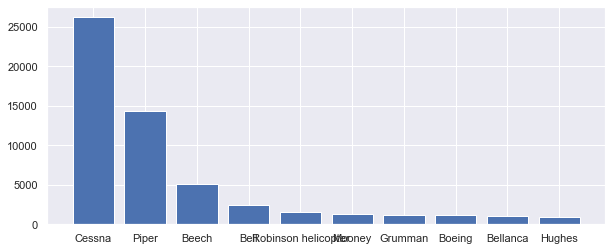

In [57]:
#Graph #Accidents vs make of plane
fig, ax = plt.subplots(figsize=(10,4))

x = accident_df['make'].value_counts().nlargest(10).index
y = accident_df['make'].value_counts().nlargest(10).values


ax.bar(x,y)

<BarContainer object of 10 artists>

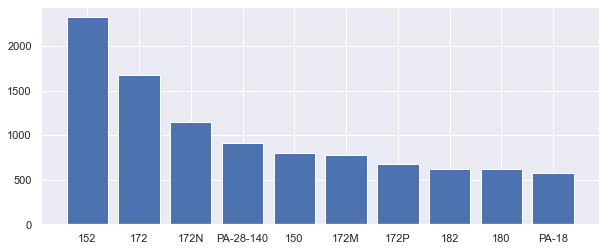

In [58]:
#Graph #Accidents vs 10 most common models of plane
fig, ax = plt.subplots(figsize=(10,4))

x = accident_df['model'].value_counts().nlargest(10).index
y = accident_df['model'].value_counts().nlargest(10).values

ax.bar(x,y)

<BarContainer object of 10 artists>

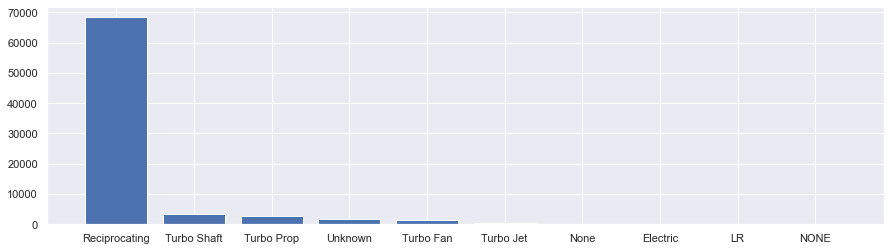

In [59]:
#Graph #Accidents vs 10 most common engine type of plane
fig, ax = plt.subplots(figsize=(15,4))

x = accident_df['engine_type'].value_counts().nlargest(10).index
y = accident_df['engine_type'].value_counts().nlargest(10).values

ax.bar(x,y)

<BarContainer object of 7 artists>

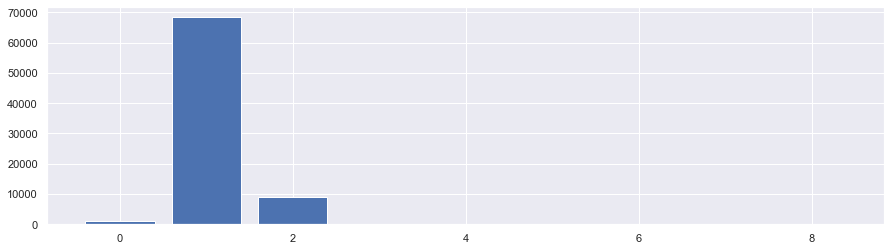

In [60]:
#Graph #Accidents vs 10 most common number of engines
fig, ax = plt.subplots(figsize=(15,4))

x = accident_df['number_of_engines'].value_counts().nlargest(10).index
y = accident_df['number_of_engines'].value_counts().nlargest(10).values

ax.bar(x,y)

<BarContainer object of 7 artists>

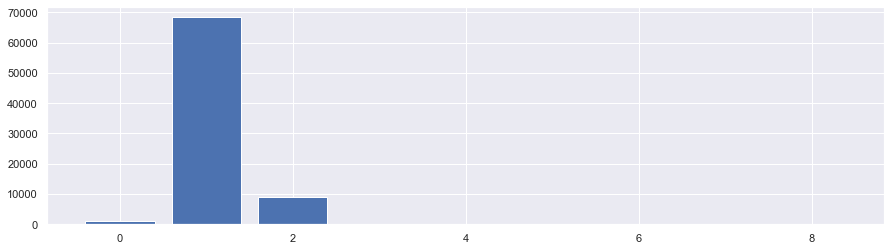

In [61]:
#Graph #Accidents vs 10 most common number of engines
fig, ax = plt.subplots(figsize=(15,4))

x = accident_df['number_of_engines'].value_counts().nlargest(10).index
y = accident_df['number_of_engines'].value_counts().nlargest(10).values

ax.bar(x,y)

<BarContainer object of 3 artists>

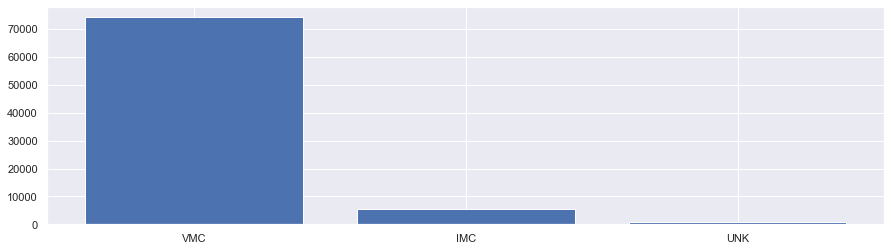

In [62]:
#Graph #Accidents vs weather conditions
#VMC stands for visual meteorological conditions and IMC stands for instrument meteorological conditions
fig, ax = plt.subplots(figsize=(15,4))

x = accident_df['weather_condition'].value_counts().nlargest(10).index
y = accident_df['weather_condition'].value_counts().nlargest(10).values

ax.bar(x,y)

<BarContainer object of 10 artists>

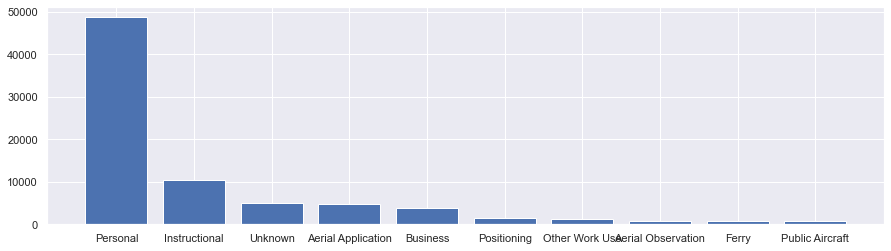

In [63]:
#Graph #Accidents vs 10 most common purpose of flight
fig, ax = plt.subplots(figsize=(15,4))

x = accident_df['purpose_of_flight'].value_counts().nlargest(10).index
y = accident_df['purpose_of_flight'].value_counts().nlargest(10).values

ax.bar(x,y)

<BarContainer object of 9 artists>

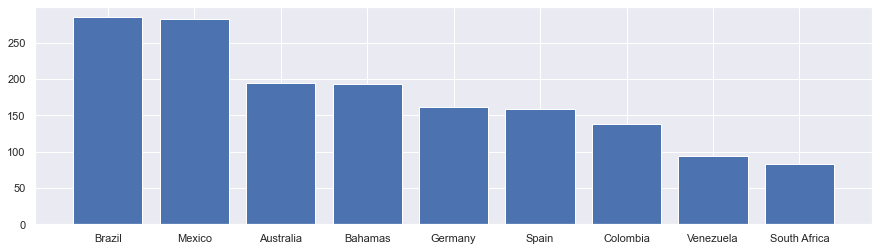

In [64]:
#Plot Accidents across countries, excluding US b/c they have wayyyy more
fig, ax = plt.subplots(figsize=(15,4))

x = accident_df['country'].value_counts().index[1:10]
y = accident_df['country'].value_counts().values[1:10]

ax.bar(x,y)

In [95]:
#Remove Nulls in total_fatal_injuries
accident_df['total_fatal_injuries'].fillna(value=0,inplace=True)
accident_df['total_minor_injuries'].fillna(value=0,inplace=True) 
accident_df['total_serious_injuries'].fillna(value=0,inplace=True) 
accident_df['total_uninjured'].fillna(value=0,inplace=True) 

#Check to confirm fill worked
accident_df['total_fatal_injuries'].isna().sum()
accident_df['total_minor_injuries'].isna().sum()
accident_df['total_serious_injuries'].isna().sum()
accident_df['total_uninjured'].isna().sum()

0

In [96]:
#Group sum of total fatalities, minor injuries, serious injuries, and uninjured by year
sum_fatalities_per_year = accident_df.groupby('year')['total_fatal_injuries'].agg(['sum'])


sum_minor_injuries_per_year = accident_df.groupby('year')['total_minor_injuries'].agg(['sum'])

sum_serious_injuries_per_year = accident_df.groupby('year')['total_serious_injuries'].agg(['sum'])

sum_uninjured_per_year = accident_df.groupby('year')['total_uninjured'].agg(['sum'])

In [97]:
accident_df['make'].value_counts()

Cessna                 26214
Piper                  14329
Beech                   5043
Bell                    2441
Robinson helicopter     1501
                       ...  
Gerlach                    1
Lawson special             1
Ott                        1
Hurley                     1
Kirchner                   1
Name: make, Length: 7458, dtype: int64

In [98]:
#Make subset of model for each incident by year
# models_by_year = accident_df.groupby(['year','model'])['total_fatal_injuries'].agg(['sum'])
# models_by_year = models_by_year.unstack()
# models_by_year

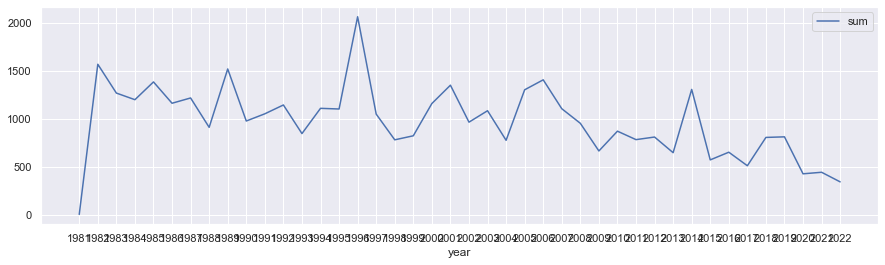

In [99]:
#Graph total fatalities per year
ax = sns.lineplot(data=sum_fatalities_per_year)
sns.set(rc={'figure.figsize':(15,4)})
plt.show()

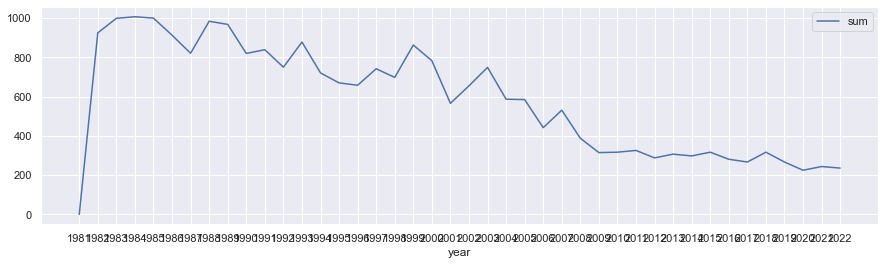

In [100]:
#Graph total minor injuries per year
ax = sns.lineplot(data=sum_minor_injuries_per_year)
sns.set(rc={'figure.figsize':(15,4)})
plt.show()

<BarContainer object of 10 artists>

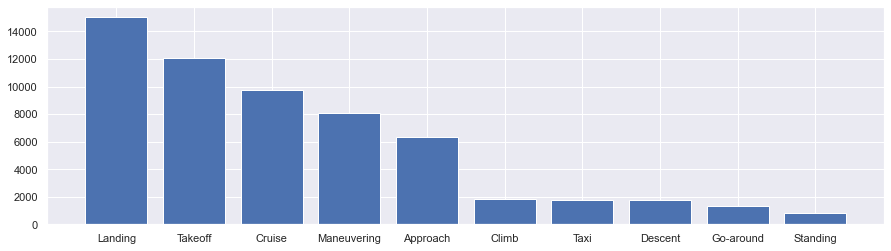

In [101]:
#Graph accidents by phase of flight
#Remove unknown later

fig, ax = plt.subplots(figsize=(15,4))

x = accident_df['broad_phase_of_flight'].value_counts().nlargest(10).index
y = accident_df['broad_phase_of_flight'].value_counts().nlargest(10).values

ax.bar(x,y)

In [102]:
#See the purposes of flight we have the most data for
accident_df['purpose_of_flight'].value_counts()

Personal                     48747
Instructional                10390
Unknown                       5082
Aerial Application            4677
Business                      3835
Positioning                   1517
Other Work Use                1202
Aerial Observation             738
Ferry                          737
Public Aircraft                680
Executive/corporate            489
Flight Test                    386
Skydiving                      178
External Load                  115
Banner Tow                     101
Public Aircraft - Federal      100
Air Race show                   89
Public Aircraft - Local         73
Public Aircraft - State         62
Air Race/show                   57
Glider Tow                      52
Firefighting                    35
Air Drop                         9
ASHO                             6
PUBS                             4
PUBL                             1
Name: purpose_of_flight, dtype: int64

In [103]:
accident_df.head()

,event_id,investigation_type,accident_number,event_date,location,country,latitude,longitude,airport_code,airport_name,...,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,publication_date,year,state,region
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001,1981,MN,Midwest
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982,1982,WA,West
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982,1982,NJ,Northeast
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,NaN,NaN,JAX,JACKSONVILLE INTL,...,0.0,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982,1982,FL,Southeast
10,20020909X01559,Accident,FTW82DA034,1982-01-01,"HOBBS, NM",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,VMC,Approach,Probable Cause,01-01-1982,1982,NM,Southwest


In [104]:
#Determine that our data is spanning 47 years
len(accident_df['year'].value_counts())

42

In [105]:
accident_df['region'].value_counts()

West                            27763
Southeast                       25301
Midwest                         16345
Northeast                        8379
Southwest                        4147
Pacific Ocean                     291
Caribbean Sea/Gulf of Mexico      149
Atlantic Ocean                     26
Name: region, dtype: int64

In [106]:
#Region Analysis
#Average fatal injuries per year per region
avg_fatal_west = accident_df['total_fatal_injuries'].loc[accident_df['region']=='West'].agg(['sum'])/len(accident_df['year'].value_counts())
print('avg_fatal_west=', avg_fatal_west)

avg_fatal_southeast = accident_df['total_fatal_injuries'].loc[accident_df['region']=='Southeast'].agg(['sum'])/len(accident_df['year'].value_counts())
print('avg_fatal_southeast=', avg_fatal_southeast)

avg_fatal_west= sum    266.52381
Name: total_fatal_injuries, dtype: float64
avg_fatal_southeast= sum    251.880952
Name: total_fatal_injuries, dtype: float64


In [107]:
accident_df.shape

(82401, 34)

In [108]:
#Export accident_df to csv
accident_df.to_csv('Data/cleaned_aviation.csv')

In [112]:
accident_df['make'].value_counts()

Cessna                 26214
Piper                  14329
Beech                   5043
Bell                    2441
Robinson helicopter     1501
                       ...  
Gerlach                    1
Lawson special             1
Ott                        1
Hurley                     1
Kirchner                   1
Name: make, Length: 7458, dtype: int64